# Метод главных компонент

### Мотивация

Если в обучающей выборке между признаками есть корреляционная взаимосвязь (мультиколлинеарность), то это может привести к неприятным последствиям, например: получение неустойчивых оценок параметров модели, невозможности правильно понять значимость параметров модели. 

Основная идея метода метода главных компонент - обеспечить такое линейное преобразование признаков, чтобы эту корреляционную взаимосвязь убрать. К тому же метод главных компонент можно использованть для понижения размерности данных.


Рассмотрим пример:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

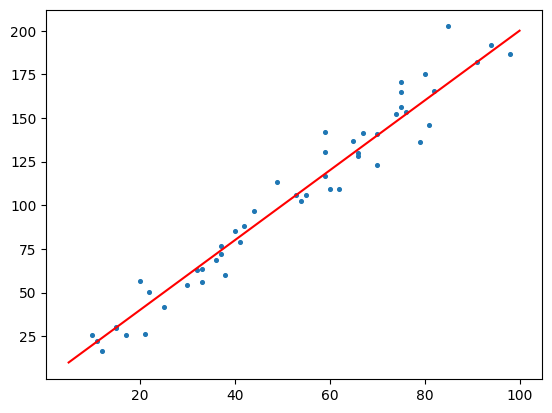

In [2]:
# сгенерируем 50 случайных чисел
X = np.random.randint(low=10, high=100, size=50)

# применим линейное преобразование и добавим немного шума
Y = 2. * X + 10. * np.random.randn(len(X))  

xx = np.linspace(5, 100, 200)
yy = 2 * xx
plt.plot(xx, yy, c='r')

plt.scatter(X, Y, s=7)

Метод главных компонент в данном случае поможет нам перейти от переменных (X, Y) опять к чему-то похожему на X. 

Тоже самое в трехмерном пространстве, если все точки лежат на какой-то гиберплоскости:

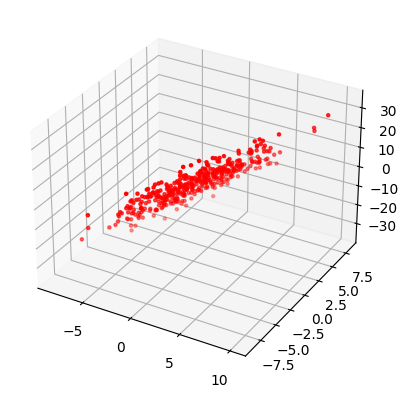

In [3]:
XY = np.random.multivariate_normal([0, 0], [[9, 5], [5, 9]], 400)

def f(x, y):
    return 5. * x - 3 * y

Z = f(XY[:, 0], XY[:, 1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xx, yy = np.meshgrid(np.linspace(-10, 10, 4), np.linspace(-10, 10, 4))
ax.scatter3D(XY[:, 0], XY[:, 1], Z, '.', s=5, c='r')


### Выборочная ковариационная матрица



Пусть $\mathbf{X}: \Omega \to \mathbb{R}^n$ случайный вектор. Матрица 

$$\mathop{cov}(\mathbf{X})=\mathop{\mathbb{E}}[(\mathbf{X} - \mathop{\mathbb{E}}[\mathbf{X}])^T(\mathbf{X} - \mathop{\mathbb{E}}[\mathbf{X}])] $$ 

называется матрицей ковариации случайного вектора $\mathbf{X}$. По сути это обобщение дисперсии для многомерной случайной величины. 


Пусть теперь у нас есть выборка размера $l$ случайной величины $\mathbf{X}$. Представим её в виде матрицы $X$ размерности $(l \times n)$, где строки это отдельные наблюдения, а по столбцам соответствующие компоненты. 

Выборочная ковариационная матрица может быть определена следующим образом: 

$$S_X = \frac{1}{l - 1}(X-M_X)^T(X-M_X)$$

где $M_X$ - выборочное среднее. 

В дальнейшим будет предполагать, что данные отцентрованы. 

Пусть как прежде есть тренировочные данные $T^l=\{(x_i, y_i)\}_{i=1}^{l}$ , каждому объекту $x \in X$ можно сопоставить вектор:  $$x \rightarrow (f_1(x), \dots, f_n(x)) \rightarrow (x^1, \dots, x^n)$$

Представим всё в виде матрицы:

$$X = \begin{pmatrix}  
    x^1_1 & \dots & x^n_1 \\
    x^1_2 & \dots & x^n_2 \\
    \vdots & \vdots & \vdots  \\
    x^1_l & \dots & x^n_l
\end{pmatrix} 
$$

выборочная ковариационная матрица имеет вид:

$$S_X = X^T X $$
  
Пусть теперь у нас есть некоторого ортогональная матрица $P$ размерности $(n \times n)$. С помощью ортогонального преобразования перейдем к новой системе координат $$Y=X P$$

Посчитаем выборочную ковариационную матрицу в этой системе координат:

$$S_Y = Y^T Y = P^T X^T X P = P^T S_X P$$

Матрица $S_X$ симметрична, и может быть представлена в виде: 

$$S_X = \hat{P} D \hat{P}^T$$

где $\hat{P}$ ортогональная матрица, столбцы которой - собственные вектора $S_X$, а $D$ диагональная матрица с собственными числами по диагонали. 

Пусть $P = \hat{P}$, тогда:

$$S_Y = \hat{P}^T \hat{P} D \hat{P}^T \hat{P} = D$$

Такое преобразование $P$ называется декоррелирующим. 

Пример, до и после преобразования.

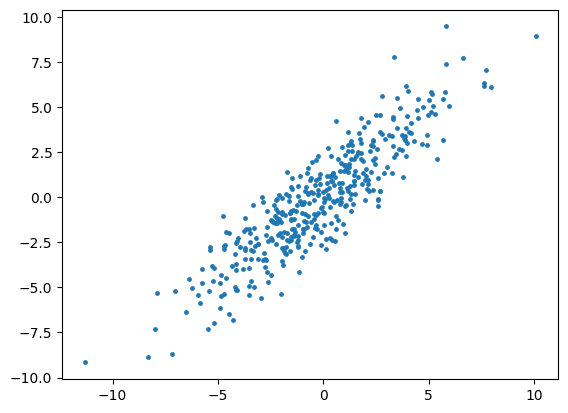

In [4]:
# Генерируем сучайные точки на плоскости
X = np.random.multivariate_normal([0, 0], [[9, 8], [8, 9]], 400)

plt.scatter(X[:, 0], X[:, 1], s=6)

In [5]:
# Вычисляем ковариационную матрицу

cov_x = np.dot(X.T, X) / (len(X) - 1)
cov_x

array([[9.38938033, 8.44444433],
       [8.44444433, 9.52964674]])

In [6]:
# Применяем декореллирующее преобразование

w, P = np.linalg.eig(cov_x)
Y = np.dot(X, P)
cov_y = np.dot(Y.T, Y) / (len(Y) - 1)
cov_y

array([[1.01477797e+00, 2.59552892e-15],
       [2.59552892e-15, 1.79042491e+01]])

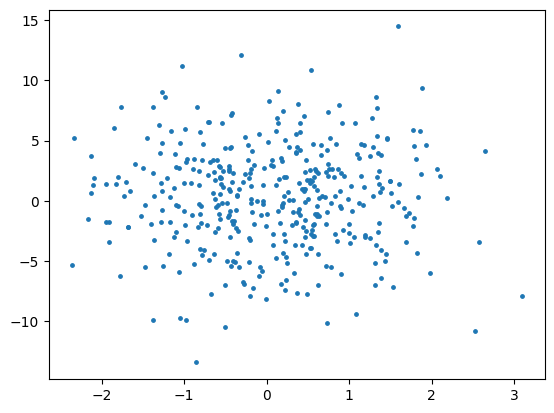

In [7]:
plt.scatter(Y[:, 0], Y[:, 1], s=6)

### Использование сингулярного разложения

Тот же результат можно получить с помощью сингулярного разложения. Матрица $X$ ранга $n$ может быть представлена в виде:

$$ X = U \Sigma V^T $$

где:

- $U$, размерность $(l \times l)$. Матрица, столбцы которой собственные векторы матрицы $X X^T (l \times l)$
- $\Sigma$, размерность $(l \times n)$. Матрица, где по диагонали стоят сингулярные числа в поредке убывания, $diag(\lambda_1, \cdots, \lambda_n)$.

- $V$, размерность $(n \times n)$. Матрица, столбцы которой собственные векторы матрицы $X^T X (n \times n)$
 
Домножим справа на $V$:
 
$$ X V = U \Sigma $$
 
Таким образовам, пусть $V$ это декорелизующее преобразование, а $U \Sigma$ - новые координаты:
 
$$ Y = U \Sigma $$
$$ P = V $$

Проверим, что преобразование действительно декоррелирующее:

$$ S_Y \sim \Sigma^T  U^T U \Sigma = \Sigma^T \Sigma$$

### Сокращение размерности

"Отрежем" от матрицы $Y$ $n-k$ правых столбцов, оставив $k$ первых.

$$Y_k = U_k \Sigma_k = X V_k$$

Таким образом, из $l$ векторов размерности $n$ мы получили $l$ векторов размерности $k$. Теперь применим обратное преобразование, и получим матрицу $X_k$, той же размерности, что и изначальная матрица $X$ - $(l \times n)$

$$X_k =  U_k \Sigma_k V_k^T = X V_k {V_k}^T $$


Посмотрим как новая матрица отличается от старой, для этого выведим выражение для нормы разницы двух матриц (норма Фробениуса, то есть корень из суммы квадратов всех элементов):


$${||X - X_k||}^2 = \mathop{tr} (X^T - {X_k}^T) (X - X_k) = \mathop{tr} X^T X - \mathop{tr} X^T X_k - \mathop{tr} X_k^T X + \mathop{tr} {X_k}^T X_k$$


Вообще говоря, по теореме Эккарта — Янга $X_k$ это наилучшее приближение ранга $k$ к матрице $X$ (в том смысле, что норма Фробениуса минимальна)
Посчитаем компоненты этого выражения по отдельности. Напомним, что $\lambda_1, \cdots, \lambda_n$ - сингулярные числа матрицы X.

$$ \mathop{tr} X^T X = V \Sigma^T U^T U \Sigma V^T = \sum_{i=1}^n \lambda_i^2 $$ 

$$ \mathop{tr} X_k^T X_k = V_k \Sigma_k^T U_k^T U_k \Sigma_k V_k^T = V_k \Sigma_k^T I_{k \times k} \Sigma_k V_k^T  = \sum_{i=1}^k \lambda_i^2$$ 

$$ \mathop{tr} X^T X_k  = \mathop{tr} X_k^T X = V_k \Sigma_k^T U_k^T U \Sigma V^T = V_k \Sigma_k^T I_{k \times l} \Sigma V^T = \sum_{i=1}^k \lambda_i^2$$  

$${||X - X_k||}^2  = \sum_{i=1}^n \lambda_i^2 -   \sum_{i=1}^k \lambda_i^2 = \sum_{i=k+1}^n \lambda_i^2$$

Величина 

$$\sigma_k = \frac{{||X - X_k||}^2}{||X||^2} = \frac{\lambda_{k+1}^2 + \cdots + \lambda_n^2}{\lambda_1^2 + \cdots + \lambda_n^2}$$

называется долей необъясненной погрешности. Число $k$ можно выбирать исходя из целевых показателей этой величины.

Метод главных компонент можно трактовать иначе:

$${||X - X_k||}^2 = {||X - X V_k {V_k}^T||}^2$$

Пусть $v^1, \ldots, v^k$ столбцы матрицы $V_k$, $x_i$ - строки матрицы $X$. Тогда

$${||X - X V_k {V_k}^T||}^2 = \sum_{i = 1}^{l}{||x - \sum_{j = 1}^{k}v^j (v^j, x_i)||^2}$$

То есть у нас есть гиперплоскость, заданная векторами $v^1, \ldots, v^k$, мы проецируем на него  $x_i$ и вычисляем растояние между проекцией и самой точкой.